<a href="https://colab.research.google.com/github/DarekGit/Documents/blob/master/02_01_FDDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Spis Treści](Praca_Dyplomowa.ipynb)

# FDDB (Face Detection Data Set and Benchmark)

FDDB (Face Detection Data Set and Benchmark) [[1]](https://github.com/DarekGit/Documents/blob/master/Bibliografia.ipynb) jest zbiorem danych dostępnych publicznie na [http://vis-www.cs.umass.edu/fddb/](http://vis-www.cs.umass.edu/fddb/). Zawiera 2845 zdjęć z 5171 oznaczonymi twarzami. Dataset został przygotowany tak by posiadał szeroki zakres trudności. Zawiera zróżnicowanie i często trudne do detekcji pozy głowy oraz zdjęcia o niskiej rozdzielczości i ostrości. Wystepują w nim obrazy kolorowe jak i w skali szarości o różnym stopniu jasności. Anotacji twarzy na zdjęciach dokonano za pomocą elips.

<center><img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/2002_07_31_big_img_636.jpg" alt="Zdjęcie z anotacjami eliptycznymi." width="600" ><br>
Rys. Zdjęcie z anotacjami eliptycznymi. <a href="https://github.com/DarekGit/Documents/blob/master/Bibliografia.ipynb">[1]</a>
</center>


Wszystkie zdjęcia wykorzystane do stworzenia datasetu pochodzą ze zbioru danych ["Faces in the Wild"](http://tamaraberg.com/faceDataset/index.html) [[3]](https://github.com/DarekGit/Documents/blob/master/Bibliografia.ipynb).

Żródłem zdjęć był serwis informacyjny Yahoo. Autorzy FDDB analizując dostępny zbiór danych znaleźli wiele duplikatów zdjęć pochodzących z tego samego źródła. Zdecydowali się usunąć jak najwięcej duplikatów zdjęć. Przykładem takiej sytuacji są dwa pierwsze zdjęcia przedstawione na poniżej. Różnią się jedynie rozdzielczością oraz intensywnością kolorów. Poza i wyraz twarzy są identyczne dlatego zdjęcia zostały zakfalifikowane jako duplikaty. Kolejne dwa zdjęca mimo, że są prawie identyczne nieznacznie różnią się pozą głowy co spowodowało, że na etapie tworzenia datasetu zostały zakfalifikowane jako różne i nie zostały usunięte.

<center>
<br>
<img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/near_duplicate_images_c.png" width="350"/>
<img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/near_duplicate_images_d.png" width="350"/>
<img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/near_duplicate_images_a.png" width="350"/>
<img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/near_duplicate_images_b.png" width="350"/>
<br> Rys. Duplikaty i zdjęcia bliskie duplikatu. <a href="https://github.com/DarekGit/Documents/blob/master/Bibliografia.ipynb">[1]</a>

 </center>


Z zestawu danych wykluczono wszystkie obszary twarzy o wysokości lub szerokości mniejszej niż 20 pikseli. W przypadku niektórych twarzy podjęcie decyzji, czy przedstawia „twarz” nie było jednoznaczne. Czynniki takie jak niska rozdzielczość (prostokąt zielony), rozmycie obrazu (prostokąt niebieski) i pozycja głowy (prostokąt czerwony) utrudniały ocenę zdjęć trakcie anotacji.

<center>
<img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/challenges_in_face_labeling.png"/>
<br> Rys. Róźnorodność regionów reprezentujących obraz twarzy. <a href="https://github.com/DarekGit/Documents/blob/master/Bibliografia.ipynb">[1]</a>
 </center>


W procesie anotacji autorzy przyjeli szerego zasad dotyczacych oceny ważności regionów obrazu jako regionów twarzy. Przyjęto min. zasadę by odrzucać obszary twarzy, w przypadku których żadne z dwóch oczu (ani okularów) nie było widoczne na zdjeciu. Pomijano również twarze co do których nie można było jednoznacznie oszacować ich pozycji, rozmiaru lub orientacji. Wszystkie wytyczne zostały umieszczone w załączniku A do artykułu "FDDB: A Benchmark for Face Detection in Unconstrained Settings". <a href="https://github.com/DarekGit/Documents/blob/master/Bibliografia.ipynb">[1]</a>
<br><br>
Ponieważ pojedyncza ludzka decyzja dotycząca określenia etykiety dla niektórych regionów obrazu może być niespójna, zastosowaliśmy podejście oparte na statystykach zgodności z wieloma ludzkimi adnotatorami. Wszystkie te regiony twarzy były prezentowane różnym osobom za pośrednictwem interfejsu internetowego w celu uzyskania wielu niezależnych decyzji dotyczących ważności tych regionów obrazu jako regionów twarzy. Adnotatorzy zostali poinstruowani, aby odrzucić obszary twarzy, w przypadku których żadne z dwóch oczu (ani okularów) nie było widoczne na obrazie. Poproszono ich również o odrzucenie regionu twarzy, jeśli nie byli w stanie (jakościowo) oszacować jego pozycji, rozmiaru lub orientacji. 
<br>



## Ewaluacja i przyjete metryki

Do oceny stopnia dopasowania pomiędzy detekcją a anotowanym regionem przyjęto miarę Intersection over Union, dla detekcji $d_{i}$ i anotacji $l_{j}$ opisaną przez autorów jako:<br><br>
$$S(d_{i}, l_{j})=\frac{area(d_{i})∩area(l_{j})}{area(d_{i})∪area(l_{j})}$$
<br>
Przyjęto również 2 metryki ewaluacji:

* Discrete score (DS) : $y_{i}=δ_{S(d_{i},v_{i})>0.5}$
* Continuous score (CS): $y_{i}=S(d_{i}, v_{i})$,
<br>
dla detekcji $d_{i}$ i dopasowania $v_{i}$.<br>

W przypadku abu metryk autorzy zalecają analizę krzywych ROC w celu porównania wydajności modeli na tym zbiorze danych.
Przykładowe krzywe ROC dla detektorów Viola-Jones detector, Mikolajczyk’s face detector, W. Kienzle face detection library zostały przedstawione na poniższych wykresach.


<center>
<br><br>
<img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/roc_discrete_score.png" width="400"/><br>
<i>ROC discrete score (DS)</i>
<br><br>
<img src="https://raw.githubusercontent.com/DarekGit/Documents/master/Figures/roc_continuous_score.png" width="400" /><br> 
<i>ROC continuous score (CS)</i>
<br>
<b>Rys. Krzywe ROC dla różnych algorytmów wykrywania twarzy. <a href="https://github.com/DarekGit/Documents/blob/master/Bibliografia.ipynb">[1]</a>

</b>
</center>

## Pobranie datasetu

Oryginalny zestaw obrazów można pobrać ze strony http://tamaraberg.com/faceDataset/originalPics.tar.gz <br>Rozpakowanie pliku **originalPics.tar.gz** do wskazanego podkatalogu tworzy określoną strukturę katalogów zawierających zdjęcia :
```
FDDB/ rok/ miesiąc/ dzień/ big/ *.jpg
```

In [ ]:
!mkdir FDDB
!wget  http://tamaraberg.com/faceDataset/originalPics.tar.gz 
!tar -xf originalPics.tar.gz -C FDDB
!wget  http://vis-www.cs.umass.edu/fddb/FDDB-folds.tgz
!tar -xf FDDB-folds.tgz -C FDDB

## Annotacje

Rozpakowanie pliku **FDDB-folds.tgz** tworzy katalog **FDDB-folds** zawieracjący pliki z anotacjami zdjęć FDDB-fold-xx-ellipseList.txt i pliki **FDDB-fold-xx.txt** przechowujące ścieżki go zdjęć.  
Przykładowa zawartość pliku **FDDB-fold-01.txt**
```txt
2002/08/11/big/img_591
2002/08/26/big/img_265
2002/07/19/big/img_423
2002/08/24/big/img_490
```
oraz **FDDB-fold-01-ellipseList.txt**

```
2002/08/11/big/img_591
1
123.583300 85.549500 1.265839 269.693400 161.781200  1
2002/08/26/big/img_265
3
67.363819 44.511485 -1.476417 105.249970 87.209036  1
41.936870 27.064477 1.471906 184.070915 129.345601  1
70.993052 43.355200 1.370217 340.894300 117.498951  1
2002/07/19/big/img_423
1
87.080955 59.379319 1.550861 255.383099 133.767857  1
2002/08/24/big/img_490
1
54.692105 35.056825 -1.384924 145.665694 78.101005  1
```

Format zastosowanych anotacji został określony zgodnie z ponizszym szablonem:

```
...
<nazwa pliku wraz ze ścieżka>
<ilość twarzy anotowanyc na zdjęciu>
<anotacja twarzy 1>
<anotacja twarzy 2>
...
<anotacja twarzy n>
...
```

Każda twarz jest oznaczona przez:
```
<major_axis_radius minor_axis_radius angle center_x center_y 1>
```

##Utworzenie metryki datset

```
'root': str, katalog indexu obrazu
'file': str, nazwa pliku dla indexu obrazu 
'path': str,sciezka dla indexu obrazu
'ori_size': [x,y] rozmiar obrazu
'grey': True jesli obraz czarnobialy
'depth': int, ilosc kolorow
'marks':[[O,o,k,xc,yc]] współrzędne elips
'ebxs': [[l,t,r,b]] współrzędne ekstrapolownych boxow
'mean': [[r,g,b]*2] sśednia i odchylenie, dla cz/b rowniez podane w 3 składowych
'val': bool, True dla wybranych obrazow do zestawu walidacyjnego
```

In [ ]:
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import torch
import os
import json
import PIL.Image as Image
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import collections as mc
from torch.utils.data import Dataset, DataLoader
from matplotlib.patches import Ellipse
from matplotlib import collections as mc

In [ ]:
def fddb_metrics(root, f_ext='.jpg'):
  if not '/' in root: root=root+'/'
  if not '.' in f_ext: f_ext='.'+f_ext
  metrics=[]
  files_annot=set(os.listdir(root+'FDDB-folds/'))  
  flist=set()
  for f in files_annot:
    if not 'ellipse' in f: 
      flist.add(f)
  files_annot=files_annot-flist
  imglist=set()
  for file in flist:
    for path in open(root+'FDDB-folds/'+file).read().strip().split('\n'): 
      imglist.add(path)
  for file in files_annot:
    i=0
    annot=open(root+'FDDB-folds/'+file).read().strip().split('\n')
    while i<len(annot):
      if annot[i] in imglist: 
        file=annot[i] if '.' in annot[i] else annot[i]+f_ext
        marks=[]
        for ii in range(int(annot[i+1])):
          l,s,k,x,y,_,p=annot[i+2+ii].split(' ') #p=1 constant
          marks.append([float(l),float(s),float(k),float(x),float (y)])
        metrics.append({'root':root, 'file':file,'marks':marks}) #no array for json
        i=i+1+ii
      i+=1
  return metrics

In [ ]:
metrics=fddb_metrics('FDDB/')

In [ ]:
metrics[0]

{'file': '2002/08/22/big/img_141.jpg',
 'marks': [[65.8899, 39.72, -1.530189, 218.36, 87.018],
  [36.191, 24.3071, -1.534162, 44.0155, 251.0811],
  [23.6832, 16.5362, 1.567965, 114.8239, 84.8169]],
 'root': 'FDDB/'}

Ekstrapolacja prostokąta z anotacji eliptycznej.

In [ ]:
def eboxes(m,p=0.6):
  # p obnizenie gornej krawedzi boksa
  m=np.array(m)
  B_m=np.array([[[-l*p,s],[l,-s]]for l,s in m[:,:2]])
  #macierz rotacji 90deg
  rot=np.array([[[0,1],[-1,0]]for k in m[:,2]])        
  #rotacja i przesuniecie do srodka (xc,yc) dla poszczegolnych zestawow
  for i,B in enumerate(B_m):
    B_m[i]=np.dot(B,rot[i])
    B_m[i,:,0]+=m[i,3]
    B_m[i,:,1]+=m[i,4]
    eboxes=[]
    for B in B_m:
      l,t=B[0]
      r,b=B[1]
      eboxes.append([l,t,r,b])
  return eboxes

Dodatkowe informacje określające zdjęcia wchodzące w skład datasetu.

In [ ]:
for m in metrics:
  path=m['root']+m['file']
  img=Image.open(path)
  depth=img.layers
  m['path']=path
  m['ori_size']=img.size 
  m['depth']=depth
  m['grey']=True if depth==1 else False
  m['ebxs']=eboxes(m['marks'])

mean_sum,std_sum2 = 0,0
for i,m in enumerate(metrics):
  path=m['path']
  img=Image.open(path)
  s=img.size
  if m['grey']: 
    img=np.outer(img,np.ones(3)).reshape((s[1],s[0],3))
  mean = np.mean(img,axis=(0,1),dtype=np.float64) 
  mean_sum+=mean
mean=mean_sum/(i+1)

for i,m in enumerate(metrics): 
  path=m['path']
  img=Image.open(path)
  s=img.size
  if m['grey']: 
    img = np.outer(img,np.ones(3)).reshape((s[1],s[0],3))
  img_m = (img - np.outer(np.ones((s[1],s[0])),mean).reshape((s[1],s[0],3)))**2 
  std = np.mean(img_m,axis=(0,1),dtype=np.float64) 
  std_sum2+=std
std=np.sqrt(std_sum2/(i+1))

for m in metrics:
  m['mean_std']=[list(mean),list(std)]

In [ ]:
metrics[0]

{'depth': 3,
 'ebxs': [[178.64000000000001,
   47.48406000000001,
   258.08000000000004,
   152.90789999999998],
  [19.708400000000005, 229.3665, 68.3226, 287.2721],
  [98.2877, 70.60698000000001, 131.3601, 108.5001]],
 'file': '2002/08/22/big/img_141.jpg',
 'grey': False,
 'marks': [[65.8899, 39.72, -1.530189, 218.36, 87.018],
  [36.191, 24.3071, -1.534162, 44.0155, 251.0811],
  [23.6832, 16.5362, 1.567965, 114.8239, 84.8169]],
 'mean_std': [[113.6489608734941, 102.0850796030607, 94.88690083708492],
  [76.23849876047743, 71.51486579842069, 70.97418035982467]],
 'ori_size': (450, 355),
 'path': 'FDDB/2002/08/22/big/img_141.jpg',
 'root': 'FDDB/'}

##Display images function with remarks

In [ ]:
def box_rotated(Ms,fix=False): 
  #boxy opisujace n elips o wymiarach n*(l,s,alfa,xc,yc)
  #punkty protokata bez przesuniecia xy
  B_m=np.array([[[-l,s],[l,s],[l,-s],[-l,-s],[-l,s]] for l,s in Ms[:,:2]])
  if fix: #macierze rotacji 90deg
    rot=np.array([[[0,1],[-1,0]] for k in Ms[:,2]])
  else: #macierze rotacji dla alfa
    rot=np.array([[[np.cos(k),np.sin(k)],[-np.sin(k),np.cos(k)]]
                  for k in Ms[:,2]])
  #obrot i przesuniecie dla poszczegolnych zestawow elips
  for i,B in enumerate(B_m):
      B_m[i]=np.dot(B,rot[i])
      B_m[i,:,0]+=Ms[i,3]
      B_m[i,:,1]+=Ms[i,4]
  return B_m

In [ ]:
def ellipses(Ms,lw=2,ec='green',fc='None'):
   return [Ellipse(xy=(m[3],m[4]), width=m[0]*2, height=m[1]*2,
                   angle=m[2]/np.pi*180, lw=lw,ec=ec,fc=fc) for m in Ms]

In [ ]:
cfg={'colors':[('green',2),('white',1),('red',2),('blue',1)],
      'cells':{'marks':'Marks','ebxs':'Extrapolated Boxes'},
      'title':'True','ellips':['e','ab','rb'],'figsize':(12,12)}

In [ ]:
class printc():
  def __init__(self):
    self.Ns={'black':'k', 'red':'r', 'green':'g', 'blue':'b',
        'yellow':'y', 'magenta':'m', 'cyan':'c', 'white':'w',
        'lightred':'lr', 'lightgreen':'lg', 'lightblue':'lb',
        'lightyellow':'ly', 'lightmagenta':'lm', 'lightcyan':'lc', 'lightwhite':'lw'}
    self.Cs={'k':30,'r':31,'g':32,'y':33,'b':34,'m':35,'c':36,'w':37,
        'lr':91,'lg':92,'ly':93,'lb':94,'lm':95,'lc':96,'lw':97,'e':0,}
  def __call__(self,txt,col='e',**args):
    if col in self.Ns.keys(): 
      col=self.Ns[col]
    if col in self.Cs.keys(): 
      txt='\033['+str(self.Cs[col])+'m'+txt+'\033[0m'
    print(txt,**args)
    
Pc=printc()

In [ ]:
def plot_marks(img,metric,cfg=None,figsize=(14,14),pref='',det=False): 
  cfg={'colors':[('green',1),('white',1),('red',2),('blue',1)],
      'cells':{pref+'marks':'Marks', pref+'ebxs':'Extrapolated Boxes'},
      'title':'True','ellips':['e','rb','ab']} if cfg==None else cfg 
  if det: 
    cfg['cells']['dbxs']='Detected Boxes'
  if 'figsize' in cfg.keys(): 
    figsize=cfg['figsize']
  fig, ax = plt.subplots(1,1,figsize=figsize) 
  ax.imshow(img)
  if not 'title' in cfg.keys(): 
    title=False 
  else: 
    title=cfg['title'] 

  for i,key in enumerate(cfg['cells'].keys()):
    if'/'in key: 
      keys=key.split('/'); Ms=np.array(metric[keys[0]][keys[1]])
    else: 
      Ms=np.array(metric[key])
    color,lw=cfg['colors'][i%len(cfg['colors'])]
    
    if key=='dbxs': 
      for n,dbx in enumerate(metric['dbxs']):
        ls = [k for k,x in enumerate(np.array(metric['TP'])[:,0]) if x==n] 
        for k in ls: 
          ax.annotate('{:.2f}'.format(metric['TP'][k][2]),dbx[:2],color='w')

    if len(Ms[0])==5:
      if 'e' in cfg['ellips']: 
        for e in ellipses(Ms,lw=lw,ec=color): 
          ax.add_artist(e)
        if title: Pc(' \Ellipses',color,end=' ,')
      if 'rb' in cfg['ellips']:
        cbox = mc.LineCollection(box_rotated(Ms), linewidth=lw, colors=color) 
        ax.add_collection(cbox)
        if title: Pc(' \Rotated boxes',color,end=' ,')
      if 'ab' in cfg['ellips']:
        cbox = mc.LineCollection(box_rotated(Ms,fix=True), linewidth=lw, colors=color)
        ax.add_collection(cbox)
        if title: Pc(' \Annotated boxes',color,end=' ,')  
    if len(Ms[0])==4:
      cbox = mc.LineCollection([[[l,t],[r,t],[r,b],[l,b],[l,t]] for l,t,r,b in Ms], linewidth=lw, colors=color)
      ax.add_collection(cbox)
      if title: Pc(' '+cfg['cells'][key],color,end=' ,')   
  plt.axis('off')
  plt.show()

 \Ellipses , \Rotated boxes , \Annotated boxes , Extrapolated Boxes ,

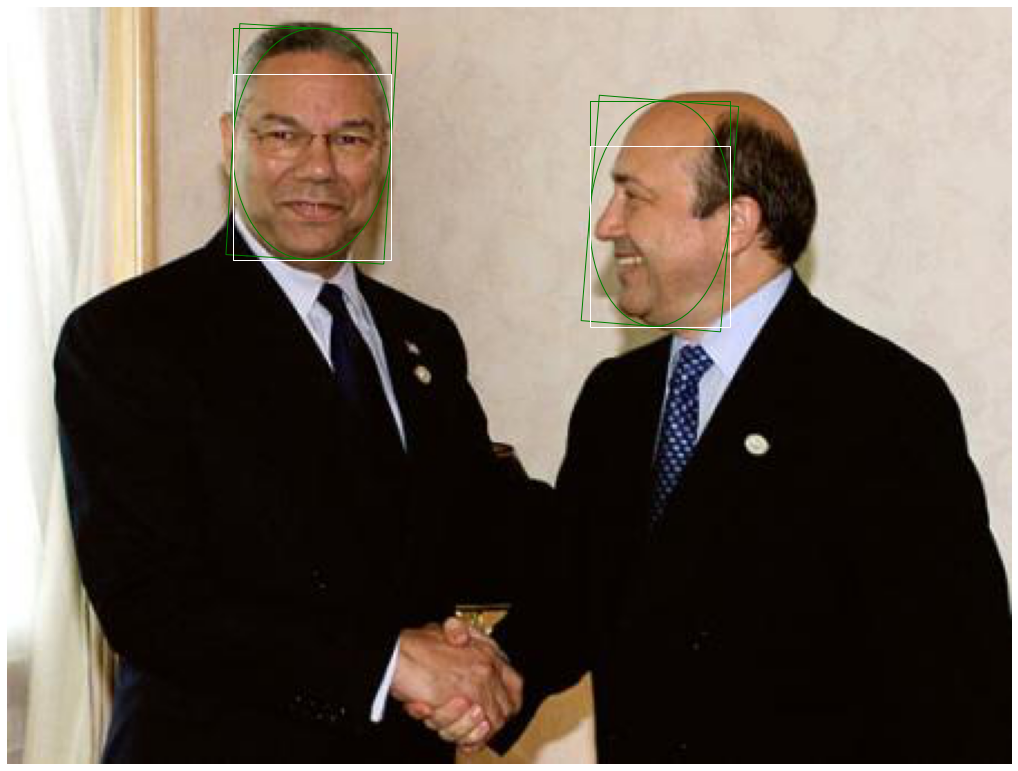

In [ ]:
m=metrics[567]
img=Image.open(m['path'])
plot_marks(img,m,figsize=(18,14))

 \Ellipses , \Rotated boxes , \Annotated boxes , Extrapolated Boxes ,

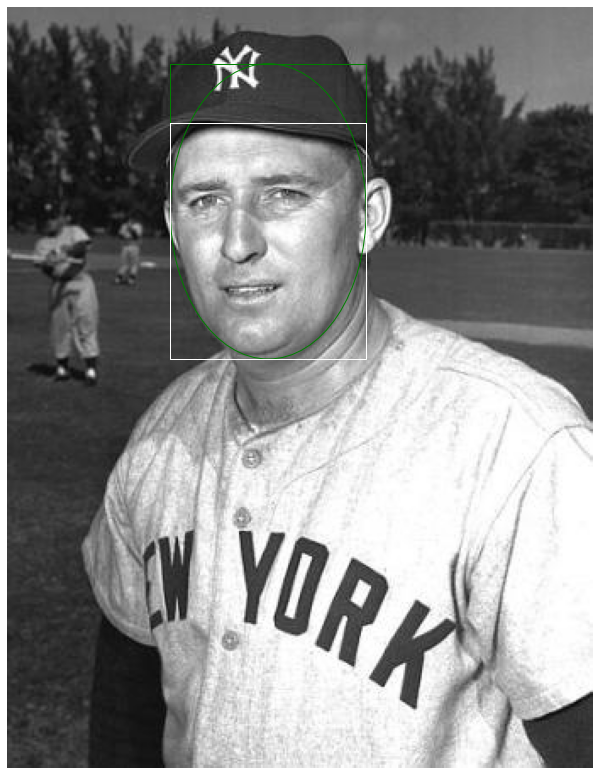

In [ ]:
for m in metrics:
  if m['grey']: break
img=Image.open(m['path'])
img=im=np.outer(img,np.ones(3)).reshape((img.size[1],img.size[0],3)).astype(int)
plot_marks(img,m)

##Dataset class

In [ ]:
class FDDB_Dataset(Dataset):
    def __init__(self, metric, transform=None):
        self.transform = transform
        self.metr =[]
        for m in metric: 
          self.metr.append(m)

    def __len__(self):
        return len(self.metr)

    def nb_faces(self):
      count=0 
      for m in self.metr: count+=len(m['marks'])
      return count
    def metric(self): return self.metr
    def get(self,idx):
        idx=int(idx); path = self.metr[idx]['path']
        return Image.open(path), self.metr[idx]

    def __getitem__(self, idx):
        idx=int(idx); m=self.metr[idx]; path =m['path']; 
        grey=True if m['depth']==1 else False

        img = torch.tensor(np.array(Image.open(path)))
        if grey: img=img.expand((3,*img.size())).permute(1,2,0)
        boxes=torch.tensor(m['ebxs'])
        
        if self.transform: 
          return self.transform(img), boxes
        else: return  img,boxes

In [ ]:
dataset = FDDB_Dataset(metrics)
dataset .__len__(), dataset .nb_faces()

(2845, 5171)

(381, 450)


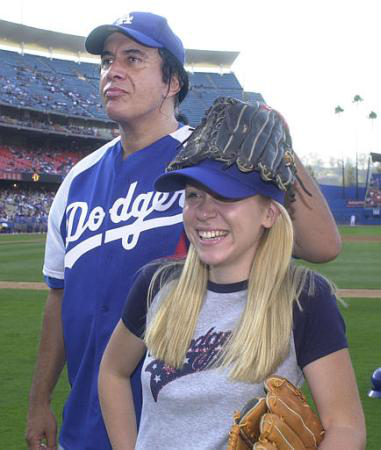

In [ ]:
img,img_ind = dataset.get(88)
print(img.size)
img